In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")######csvファイルを読み込むのはpandas#####
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
#####データ解析#####
#train_data.Cabin.value_counts()
#train_data.info()
#len(train_data["Age"].isna())
#train_data.describe()
#train_data.describe(include=["O"])
#train_data[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

#g=sns.FacetGrid(train_data,col="Survived")
#g.map(plt.pyplot.hist,"Age",bins=20)
#g=sns.FacetGrid(train_data,col="Survived",row="Pclass",size=2.2,aspect=1.6)
#g.map(plt.hist,'Age',alpha=.5,bins=20)
#g.add_legend()

#g=sns.FacetGrid(train_data,row="Embarked",col="Survived",size=2.2,aspect=1.6)
#g.map(sns.barplot,"Sex","Fare",alpha=.5,ci=None)

train_data["AgeBand"]=pd.cut(train_data["Age"],5)
train_data[["AgeBand","Survived"]].groupby(["AgeBand"],as_index=False).mean()



,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [3]:
#####データの整形#####
dataset=[train_data,test_data]
"""
train_data["Ticket_type"]=train_data["Ticket"].apply(lambda x: x[0:3])
train_data["Ticket_type"]=train_data["Ticket_type"].astype("category")
train_data["Ticket_type"]=train_data["Ticket_type"].cat.codes
"""
for d in dataset:
    
    d["Ticket_type"]=d["Ticket"].apply(lambda x: x[0:3])
    d["Ticket_type"]=d["Ticket_type"].astype("category")
    d["Ticket_type"]=d["Ticket_type"].cat.codes
    d.drop(["Ticket"],axis=1,inplace=True)#####for文で回すものd自身を変えていくときは、変更したdを保持しないといけない。d=d.~にすると、元のdが代入されてしまう。
    
    
    d["Title"]=d.Name.str.extract('([A-Za-z]+)\.',expand=False)
    d["Title"]=d["Title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],"Rare")
    d['Title'] = d['Title'].replace('Mlle', 'Miss')
    d['Title'] = d['Title'].replace('Ms', 'Miss')
    d['Title'] = d['Title'].replace('Mme', 'Mrs')
    d['Title']= d['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    
    d.drop(["Name"],axis=1,inplace=True)
    
    d["Sex"]=d["Sex"].map({"female":1,"male":0}).astype(int)
    
    d["Age"].fillna(d["Age"].dropna().median(),inplace=True)
    d.loc[d["Age"]<=16,"Age"]=0
    d.loc[(d['Age'] > 16) & (d['Age'] <= 32), 'Age'] = 1
    d.loc[(d['Age'] > 32) & (d['Age'] <= 48), 'Age'] = 2
    d.loc[(d['Age'] > 48) & (d['Age'] <= 64), 'Age'] = 3
    d.loc[ d['Age'] > 64, 'Age']=4
    d['Age']=d['Age'].astype(int)
    
    d["Age*Class"]=d.Age*d.Pclass

    
    d["Embarked"]=d["Embarked"].fillna("S")
    d["Embarked"]=d["Embarked"].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
    d["Fare"].fillna(d["Fare"].dropna().median(),inplace=True)
    d.loc[d["Fare"]<=7.91,"Fare"]=0
    d.loc[(d['Fare'] > 7.91) & (d['Fare'] <= 14.454), 'Fare'] = 1
    d.loc[(d['Fare'] > 14.454) & (d['Fare'] <= 31), 'Fare']   = 2
    d.loc[ d['Fare'] > 31, 'Fare'] = 3
    d['Fare']=d['Fare'].astype(int)
    
    d.info()
    

#test_data.head()
#pd.crosstab(train_data['Title'], train_data['Sex'])
dataset[0]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    int64   
 8   Cabin        204 non-null    object  
 9   Embarked     891 non-null    int64   
 10  AgeBand      714 non-null    category
 11  Ticket_type  891 non-null    int16   
 12  Title        891 non-null    int64   
 13  Age*Class    891 non-null    int64   
dtypes: category(1), int16(1), int64(11), object(1)
memory usage: 86.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeBand,Ticket_type,Title,Age*Class
0,1,0,3,0,1,1,0,0,NaN,0,"(16.336, 32.252]",124,1,3
1,2,1,1,1,2,1,0,3,C85,1,"(32.252, 48.168]",137,3,2
2,3,1,3,1,1,0,0,1,NaN,0,"(16.336, 32.252]",148,2,3
3,4,1,1,1,2,1,0,3,C123,0,"(32.252, 48.168]",3,3,2
4,5,0,3,0,2,0,0,1,NaN,0,"(32.252, 48.168]",97,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,0,0,1,NaN,0,"(16.336, 32.252]",23,5,2
887,888,1,1,1,1,0,0,2,B42,0,"(16.336, 32.252]",2,2,1
888,889,0,3,1,1,1,2,2,NaN,0,NaN,150,2,3
889,890,1,1,0,1,0,0,2,C148,1,"(16.336, 32.252]",1,1,1


In [4]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
y=train_data["Survived"]
features=["Pclass","Sex","Age","Fare","Title","Age*Class"]
X=train_data[features]
params={"max_depth":[3,5,10,100],"n_estimators":[10,50,100],"subsample":[0.8,0.85,0.9,0.95],"colsample_bytree":[0.5,1.0]}
model=xgb.XGBClassifier()
cv=GridSearchCV(model,params,cv=5)
cv.fit(X,y)
#cv.best_params_
cv.best_score_




0.8226539451384094

In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data[:39]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

ZeroDivisionError: division by zero

In [7]:
from sklearn.ensemble import RandomForestClassifier
from 

y=train_data["Survived"]#####yは出力したい結果である#####

#features=["Pclass","Sex","SibSp","Parch"]
features=["Pclass","Sex","SibSp","Parch","Age","Fare","Embarked"]
X=pd.get_dummies(train_data[features]) ########pd.get_dummy()で入れた特徴量を自動的にワンホットエンコーディングにしてくれる。##########
X_test=pd.get_dummies(test_data[features])
"""""
model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X,y)
predictions=model.predict(X_test)
"""""


output=pd.DataFrame({"PassengerID":test_data.PassengerId,"Survived":predictions})
output.to_csv("my_submission.csv",index=False)
print("Your submission was successfully saved!")

print(type(X))

SyntaxError: invalid syntax (<ipython-input-7-be120b772708>, line 2)

{1: 549, 2: 342}


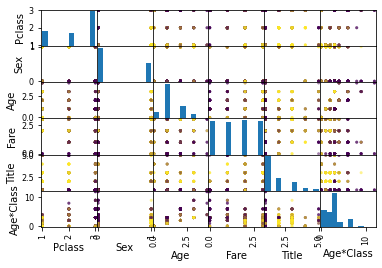

In [8]:
X_=pd.DataFrame(X,columns=X.keys())
ggr=pd.plotting.scatter_matrix(X_,c=y)
#####ペアプロットで特徴量を可視化して確認

print({n:v for n,v in zip(train_data.PassengerId,np.bincount(train_data.Survived))})

In [9]:
#######K最近傍法########

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

from sklearn.neighbors import KNeighborsClassifier
for n in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train,y_train)
    print(clf.score(X_test,y_test))


0.7937219730941704
0.757847533632287
0.8026905829596412
0.7713004484304933
0.7847533632286996
0.7802690582959642
0.820627802690583
0.8161434977578476
0.8161434977578476


In [10]:
model=RandomForestClassifier(n_estimators=5,max_depth=5,random_state=1)
model.fit(X_train,y_train)
print(model.score(X_test,y_test))
print(model.feature_importances_)


NameError: name 'RandomForestClassifier' is not defined